# Russian roulette

There are "n" armed men in a room. They will try to kill exactly one person each round until there is noone left to be shot (no suicide!) 

Q: How does the probability that one person survives changes with increasing n?

In [67]:
# Libraries
from random import choices, sample

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# Settings

# Number of armed men in the room
n_people = 10
n_samples = 10

# For each n in the list, and each scenario: track how many people survived

people_survived = {i:0 for i in range(n_samples)}

In [49]:
# Store simulation results
def run_simu(n_people, n_samples):

    # Repeat simulation
    for s in range(n_samples):

        # Only in first round - every one is still alive
        people_alive = [i for i in range(n_people)]

        # For each person in the room - select a target person to shoot at!
        # Loop until noone is left
        while (len(people_alive) > 1):

            people_shoot = []

            # Each person alive, selects another person at random to shoot at
            for i in people_alive:
                # Select person to shoot
                target_i = choices(list(set(people_alive).difference({i})), k = 1)
                # Add to people being shot
                people_shoot.append(target_i[0])


            # Select survivors
            people_alive = list(set(people_alive).difference(set(people_shoot)))

        people_survived[s] = len(people_alive)

    # Analyze simulation results
    # Probability that one person survives

    return np.mean([i for i in people_survived.values()])


In [64]:
# Repeat for different n
probs_survive = [run_simu(i, 10000) for i in range(5, 50, 1)]


(0.0, 1.0)

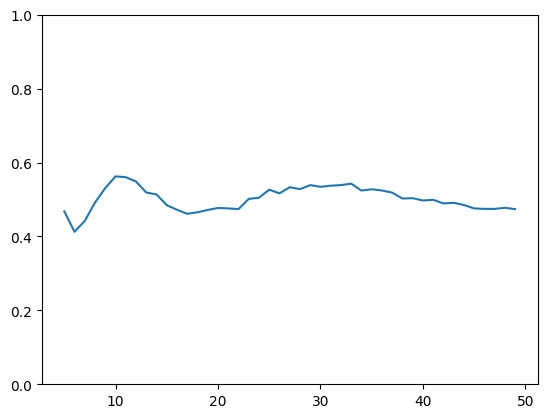

In [73]:
# Visualize results
sns.lineplot(x = range(5, 50, 1), y = probs_survive)
plt.ylim([0, 1])